In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [232]:
df = pd.read_csv('./ml_source_files/titanic_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [194]:
# preprocessing / EDA (전처리)

<AxesSubplot:>

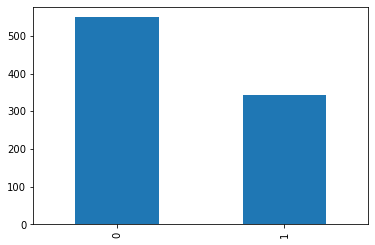

In [195]:
df.Survived.value_counts().plot(kind='bar')

C:\Users\bitcamp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

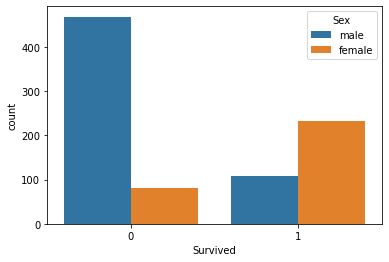

In [196]:
sns.countplot(df['Survived'], hue='Sex', data=df)

C:\Users\bitcamp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

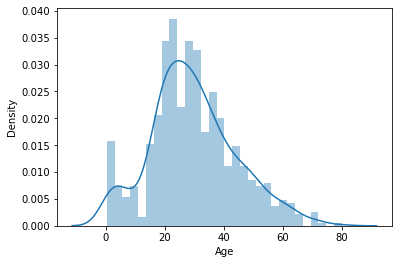

In [197]:
sns.distplot(df['Age'], bins = 30)

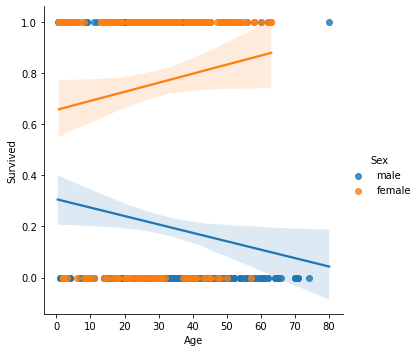

In [198]:
sns.lmplot(x='Age', y='Survived', data=df, hue='Sex')

In [199]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [226]:
df.drop('Cabin', axis = 1, inplace = True)

In [227]:
df.Age = df.Age.fillna(df.Age.mean())

In [228]:
df.dropna(inplace = True)

In [203]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [204]:
# # Male, Female
# df.Sex = df.Sex.apply(lambda  x : 0 if x == 'male' else 1)

# # S, C, Q
# df.Embarked = df.Embarked.apply(lambda x : 0 if x == 'S' else (1 if x == 'C' else 2))

In [205]:
# x, y split

In [229]:
y = df['Survived']    # 불연속 : (binary) Classification Model
x = df[['Pclass','Sex','Age','SibSp','Parch','Embarked']]

In [230]:
# x = pd.get_dummies(x)   # object => one_hot (문자열을 숫자형식으로 바꾸기)

In [231]:
# x

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,0,1,0,0,1
1,1,38.000000,1,0,1,0,1,0,0
2,3,26.000000,0,0,1,0,0,0,1
3,1,35.000000,1,0,1,0,0,0,1
4,3,35.000000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,0,1,0,0,1
887,1,19.000000,0,0,1,0,0,0,1
888,3,29.699118,1,2,1,0,0,0,1
889,1,26.000000,0,0,0,1,1,0,0


In [208]:
# train_test_split

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=111) 

In [210]:
# LogisticRegression algorithm import

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
log = LogisticRegression()

In [213]:
# Algorithm train

In [214]:
log.fit(x_train, y_train)

LogisticRegression()

In [215]:
# model predict

In [216]:
preds = log.predict(x_test)

In [217]:
preds

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [218]:
# model evaluation

In [219]:
from sklearn.metrics import classification_report, confusion_matrix

In [220]:
confusion_matrix(y_test, preds)

array([[91, 13],
       [18, 56]], dtype=int64)

In [221]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.81      0.76      0.78        74

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.82       178



In [222]:
# precision : 예측한 값을 잘 맞춘 비율, True라고 예측한 값 중에서 True인 비율
# recall : 실제 값을 잘 맞춘 비율, 실제 True인 데이터를 True라고 예측한 비율
# f1-score : precision과 recall을 조화평균한 값